# Exploratory data analysis
In this notebook I will examine the household train and test data sets for each country. Each of the data sets contains text, floats, and ints values. The text, both column names and values, have been masked by using random letters for an actual word. Thus, we don't know the actual meaning of any of the data.<br>
<br>
The follow will be explored:
- Column dtypes (object, int, and float) each country
- Columns with null values 
- Null value-count by column
- The presence of outliers
- Correlation of the numeric data to the repective target
- Visualization of the numeric data

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()

# Load the files
train_A = pd.read_csv('data/A_hhold_train.csv', index_col='id')
test_A = pd.read_csv('data/A_hhold_test.csv', index_col='id')

train_B = pd.read_csv('data/B_hhold_train.csv', index_col='id')
test_B = pd.read_csv('data/B_hhold_test.csv', index_col='id')

train_C = pd.read_csv('data/C_hhold_train.csv', index_col='id')
test_C = pd.read_csv('data/C_hhold_test.csv', index_col='id')

# Separate the labels from the values
labels_A = train_A.poor
train_A = train_A.drop(['poor','country'], axis='columns')
test_A = test_A.drop(['country'], axis='columns')

labels_B = train_B.poor
train_B = train_B.drop(['poor','country'], axis='columns')
test_B = test_B.drop(['country'], axis='columns')

labels_C = train_C.poor
train_C = train_C.drop(['poor','country'], axis='columns')
test_C = test_C.drop(['country'], axis='columns')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


***
## View a data at a glance

In [2]:
train_A.head()

,wBXbHZmp,SlDKnCuu,KAJOWiiw,DsKacCdL,rtPrBBPl,tMJrvvut,jdetlNNF,maLAYXwi,vwpsXRGk,sArDRIyX,...,QZiSWCCB,sDGibZrP,CsGvKKBJ,OLpGAaEu,LrDrWRjC,JCDeZBXq,HGPWuGlV,GDUPaBQs,WuwrCsIY,AlDbXTlZ
id,,,,,,,,,,,,,,,,,,,,,
46107,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,XAmOF,MwLvg,...,wxJis,JqHnW,MaXfS,etZsD,idRwx,LPtkN,vkbkA,qQxrL,AITFl,aQeIm
82739,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,lwCkE,MwLvg,...,AZwXA,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq
9646,JhtDR,GUusz,BIZns,ZYabk,uxuSS,PHMVg,NDTCU,sehIp,qNABl,MwLvg,...,AZwXA,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq
10975,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,sPNOc,MwLvg,...,wxJis,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq
16463,JhtDR,alLXR,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,NdlDR,MwLvg,...,wxJis,JqHnW,MaXfS,etZsD,idRwx,UyAms,vkbkA,qQxrL,GAZGl,aQeIm


***
## Types of data in each data set

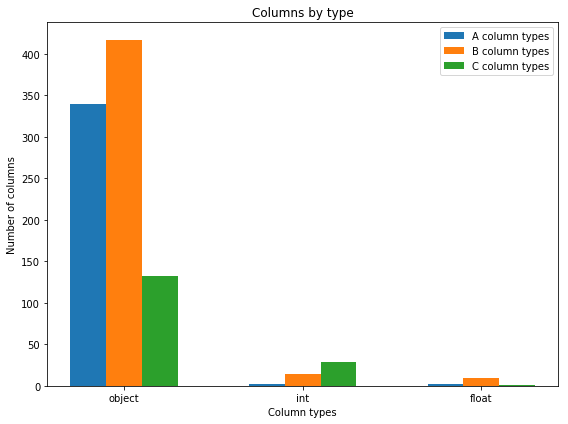

In [3]:
A_column_types = train_A.dtypes.value_counts()
B_column_types = train_B.dtypes.value_counts()
C_column_types = train_C.dtypes.value_counts()
 
# create plot
n_groups = 3
plt.figure(figsize=(8,6))
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8
 
rects1 = plt.bar(index, A_column_types, bar_width, label='A column types')
rects2 = plt.bar(index + bar_width, B_column_types, bar_width, label='B column types')
rects3 = plt.bar(index + 2*bar_width, C_column_types, bar_width, label='C column types')
 
plt.xlabel('Column types')
plt.ylabel('Number of columns')
plt.title('Columns by type')
plt.xticks(index + bar_width, ('object', 'int', 'float'))
plt.legend()
 
plt.tight_layout()
plt.show()

***
## Number of columns with null values

In [4]:
def count_null_columns(dataframe):
    dtypes = ['object', 'int64', 'float64']
    count = [0,0,0]
    
    for column in dataframe.columns:
        dtype = dataframe[column].dtype
        null_present = dataframe[column].isnull().values.any()
        
        if null_present & (dtype == 'object'):
            count[0] = count[0] + 1
        if null_present & (dtype == 'int64'):
            count[1] = count[1] + 1
        if null_present & (dtype == 'float64'):
            count[2] = count[2] + 1
    
    return count

In [5]:
# Count null columns
train_A_count_null_columns = count_null_columns(train_A)
test_A_count_null_columns = count_null_columns(test_A)

train_B_count_null_columns = count_null_columns(train_B)
test_B_count_null_columns = count_null_columns(test_B)

train_C_count_null_columns = count_null_columns(train_C)
test_C_count_null_columns = count_null_columns(test_C)

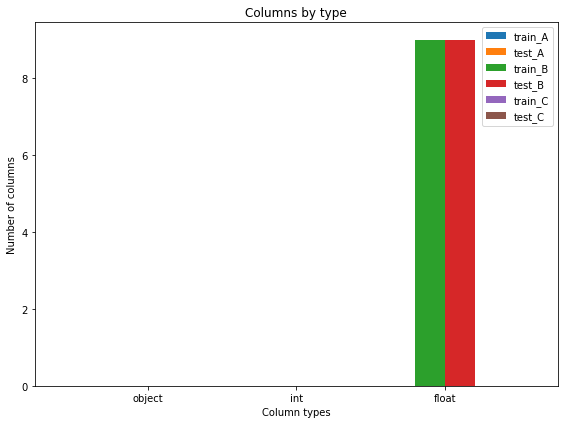

In [6]:
# create plot
n_groups = 3
plt.figure(figsize=(8,6))
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8
 
rects1 = plt.bar(index, train_A_count_null_columns, bar_width, label='train_A')
rects2 = plt.bar(index + bar_width, test_A_count_null_columns, bar_width, label='test_A')
rects3 = plt.bar(index + 2*bar_width, train_B_count_null_columns, bar_width, label='train_B')
rects4 = plt.bar(index + 3*bar_width, test_B_count_null_columns, bar_width, label='test_B')
rects5 = plt.bar(index + 4*bar_width, train_C_count_null_columns, bar_width, label='train_C')
rects6 = plt.bar(index + 5*bar_width, test_C_count_null_columns, bar_width, label='test_C')
plt.xlabel('Column types')
plt.ylabel('Number of columns')
plt.title('Columns by type')
plt.xticks(index + 2.5*bar_width, ('object', 'int', 'float'))
plt.legend()
 
plt.tight_layout()
plt.show()

### Number of nulls in the country B columns
The data sets from country B that have null values in the numeric columns. Let's explore what the trends are in the individual columns these data sets.

In [7]:
null_columns = list(train_B.loc[:,train_B.isnull().any()].columns)

In [8]:
def null_count(dataframe):
    null_count_list = []
    for column in null_columns:
        count = dataframe[column].isnull().values.sum()
        null_count_list.append(count)
    
    return null_count_list

In [9]:
train_B_nulls = null_count(train_B)
test_B_nulls = null_count(test_B)

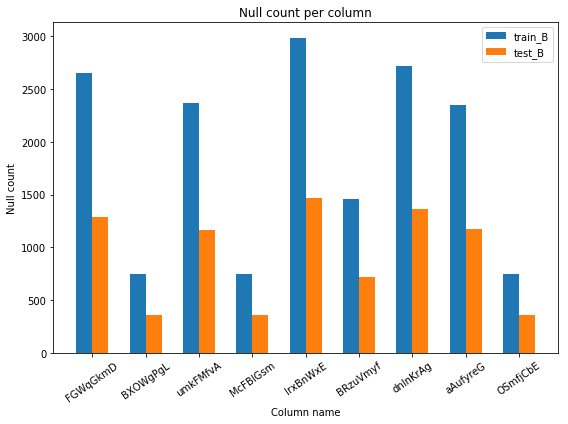

In [10]:
# create plot
n_groups = len(null_columns)
plt.figure(figsize=(8,6))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
 
rects1 = plt.bar(index, train_B_nulls, bar_width, label='train_B')
rects2 = plt.bar(index + bar_width, test_B_nulls, bar_width, label='test_B')

plt.xlabel('Column name')
plt.ylabel('Null count')
plt.title('Null count per column')
plt.xticks(rotation=35)
plt.xticks(index + .5*bar_width, null_columns)
plt.legend()
 
plt.tight_layout()
plt.show()

***
## Check for outliers in the numberic data

In [11]:
train_A_num = train_A.select_dtypes(exclude=['object'])
test_A_num = test_A.select_dtypes(exclude=['object'])

train_B_num = train_B.select_dtypes(exclude=['object'])
test_B_num = test_B.select_dtypes(exclude=['object'])

train_C_num = train_C.select_dtypes(exclude=['object'])
test_C_num = test_C.select_dtypes(exclude=['object'])

### Country A outliers

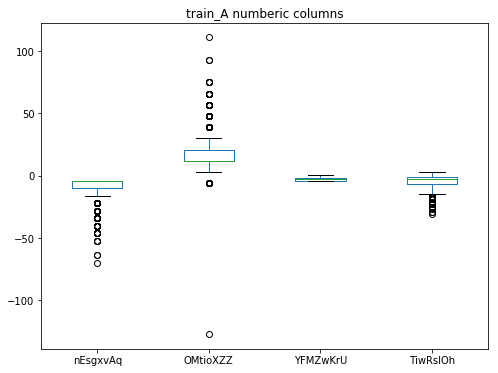

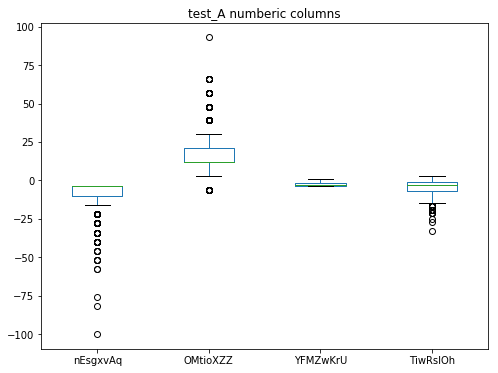

In [12]:
train_A_num.plot.box(figsize=(8,6), title='train_A numberic columns')
plt.show()
test_A_num.plot.box(figsize=(8,6), title='test_A numberic columns')
plt.show()

While the data sets of country A have an exponential decay with long tails, it doesn't seem like there any outliers with the possible exception of the "OMtioXZZ" column in the train_A set.
### Country B outlier

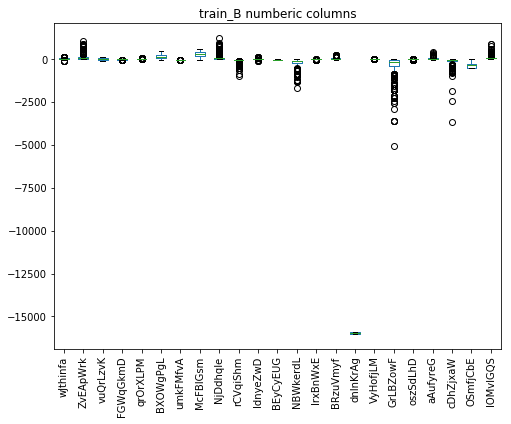

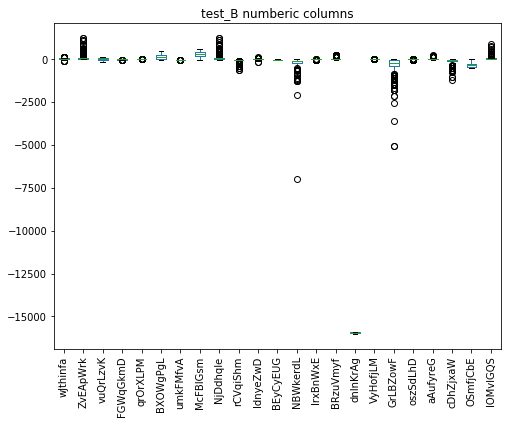

In [13]:
train_B_num.plot.box(figsize=(8,6), title='train_B numberic columns', rot=90)
plt.show()
test_B_num.plot.box(figsize=(8,6), title='test_B numberic columns', rot=90)
plt.show()

Column 'dnlnKrAg' has values that are much larger in magnitude compared to the other columns. Let's split that column from the rest of the numeric data.

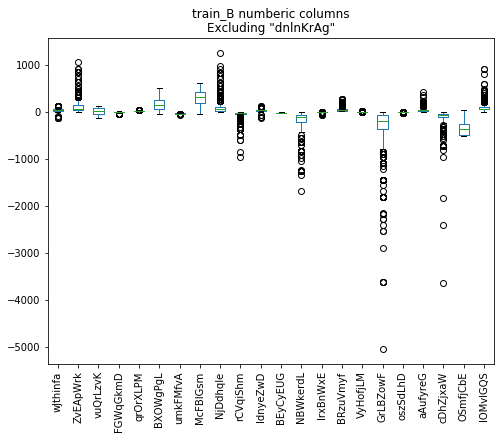

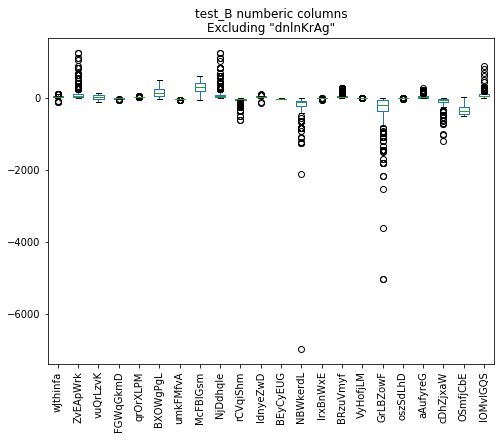

In [14]:
train_B_num.drop('dnlnKrAg', axis='columns').plot.box(figsize=(8,6), title='train_B numberic columns\nExcluding "dnlnKrAg"', rot=90)
plt.show()
test_B_num.drop('dnlnKrAg', axis='columns').plot.box(figsize=(8,6), title='test_B numberic columns\nExcluding "dnlnKrAg"', rot=90)
plt.show()

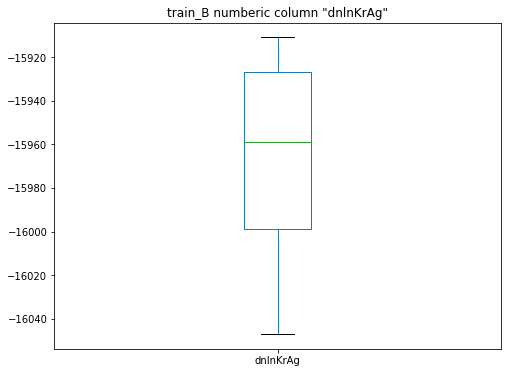

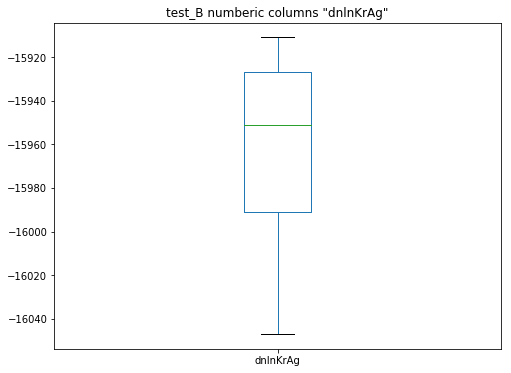

In [15]:
train_B_num.dnlnKrAg.plot.box(figsize=(8,6), title='train_B numberic column "dnlnKrAg"')
plt.show()
test_B_num.dnlnKrAg.plot.box(figsize=(8,6), title='test_B numberic columns "dnlnKrAg"')
plt.show()

The data sets of country C have a wide spread. Particularly "NBWkerdL" in the train_B set.
### Country C outlier

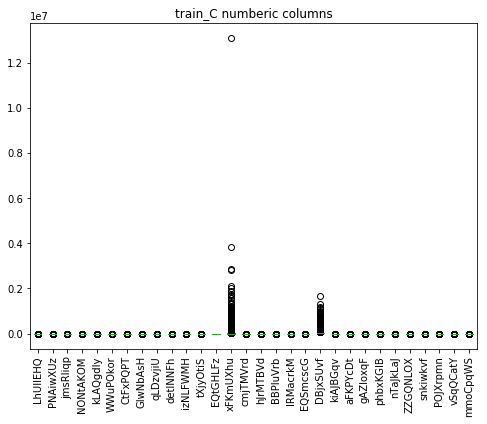

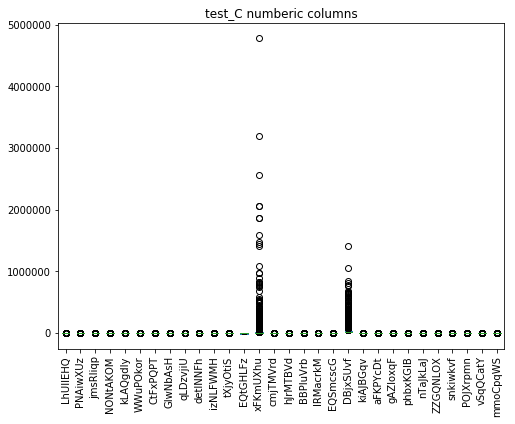

In [16]:
train_C_num.plot.box(figsize=(8,6), title='train_C numberic columns', rot=90)
plt.show()
test_C_num.plot.box(figsize=(8,6), title='test_C numberic columns', rot=90)
plt.show()

Let's separte out ['xFKmUXhu', 'DBjxSUvf'] to see the reset of the data

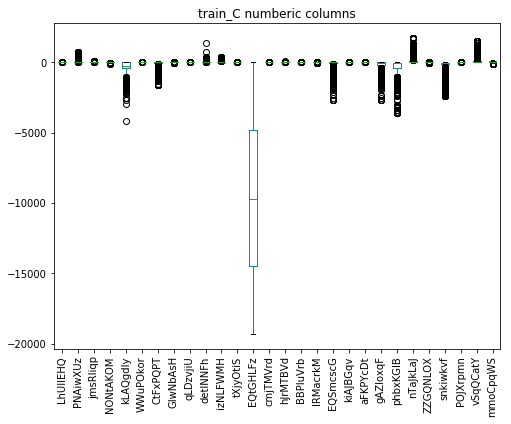

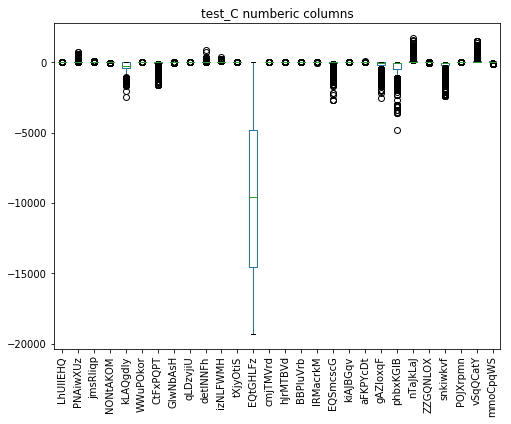

In [17]:
train_C_num.drop(['xFKmUXhu', 'DBjxSUvf'], axis='columns').plot.box(figsize=(8,6), title='train_C numberic columns', rot=90)
plt.show()
test_C_num.drop(['xFKmUXhu', 'DBjxSUvf'], axis='columns').plot.box(figsize=(8,6), title='test_C numberic columns', rot=90)
plt.show()

The data sets of country C seem fine (no outliers).
***
## Correlation in the data sets

In [18]:
# Attach the labels back to the training data sets
train_A_num.loc[:,'target'] = labels_A.astype('int')
train_B_num.loc[:,'target'] = labels_B.astype('int')
train_C_num.loc[:,'target'] = labels_C.astype('int')

/home/jesse/.local/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/jesse/.local/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [19]:
corr_A = train_A_num.corr().target.sort_values(ascending = False)
# drop the target variable and take the values
corr_A = corr_A[1:].values

corr_B = train_B_num.corr().target.sort_values(ascending = False)
# drop the target variable and take the values
corr_B = corr_B[1:].values

corr_C = train_C_num.corr().target.sort_values(ascending = False)
# drop the target variable and take the values
corr_C = corr_C[1:].values

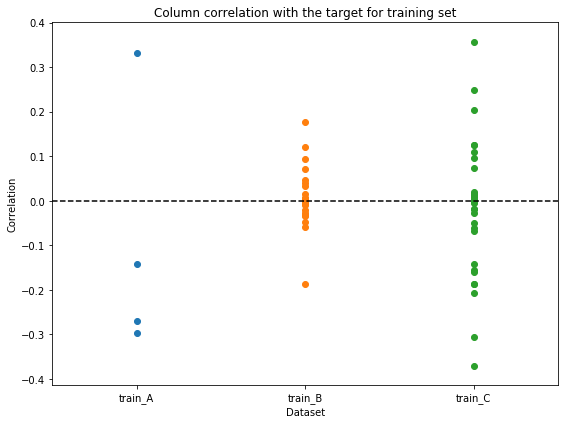

In [20]:
x_A = np.empty(len(corr_A))
x_A.fill(1)
x_B = np.empty(len(corr_B))
x_B.fill(2)
x_C = np.empty(len(corr_C))
x_C.fill(3)

plt.figure(figsize=(8,6))
plt.axhline(y=0, color='k', linestyle='--')
plt.scatter(x_A, corr_A)
plt.scatter(x_B, corr_B)
plt.scatter(x_C, corr_C)

plt.title('Column correlation with the target for training set')
plt.xlabel('Dataset')
plt.ylabel('Correlation')
plt.xlim(.5,3.5)
plt.xticks([1,2,3], ['train_A', 'train_B', 'train_C'])

plt.tight_layout()
plt.show()

***
## Visualizing the numeric data

### Country A

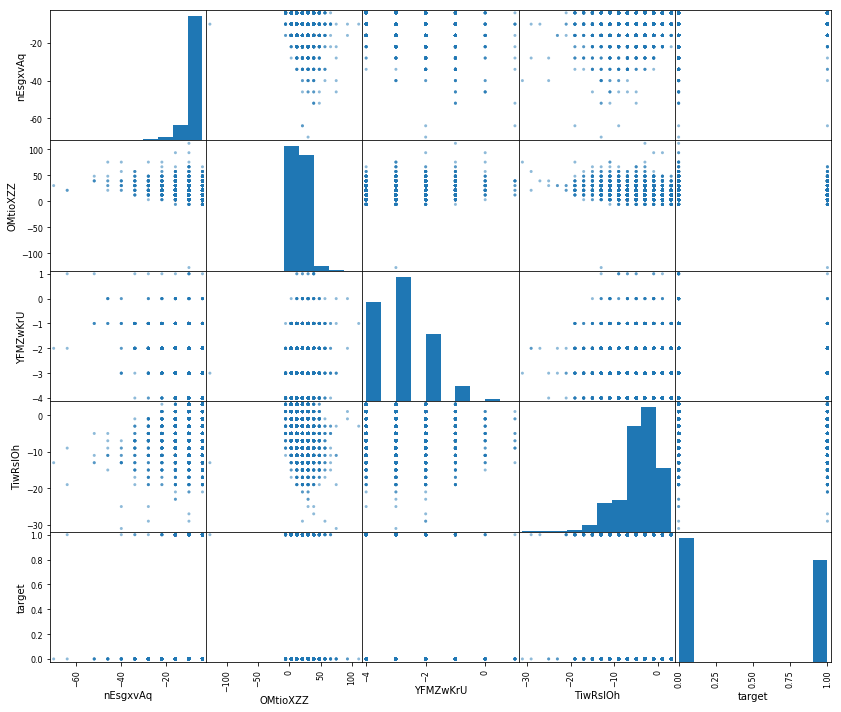

In [21]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_A_num, figsize=(14,12))
plt.show()

### Country B, this is too busy to give us any information

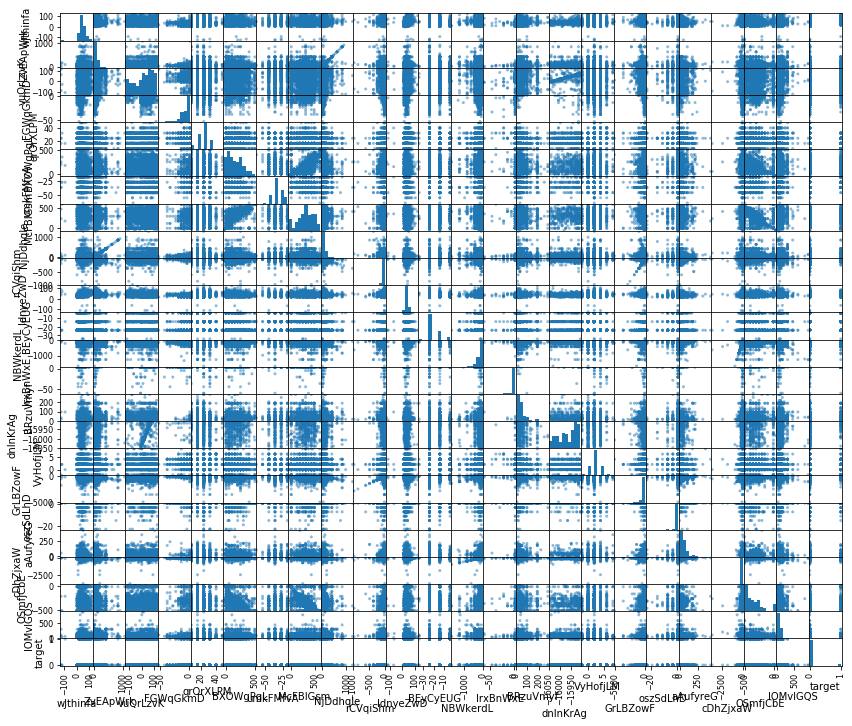

In [22]:
scatter_matrix(train_B_num, figsize=(14,12))
plt.show()

### Country C, this is to busy to give us any information

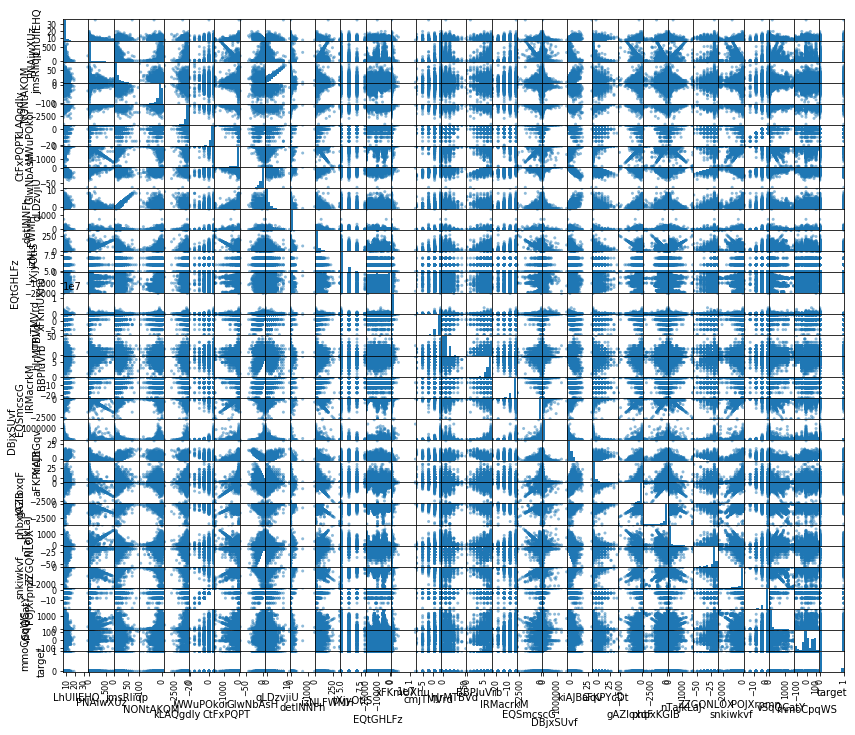

In [23]:
scatter_matrix(train_C_num, figsize=(14,12))
plt.show()